In [2]:
###Import required packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
save_figs = True

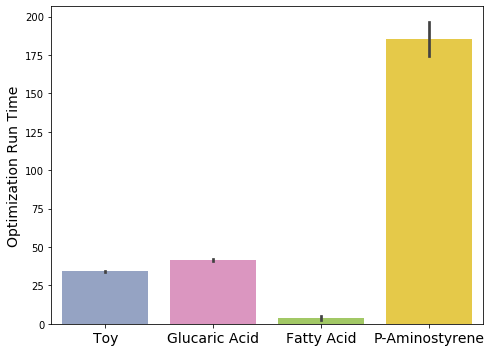

In [7]:
###FIGURE: Average Runtime bar plot 
runtime_data = pd.read_csv('../data/supplementary_data/parsed_runtime_results.csv')
pal = sns.color_palette("Set2")[2:6]
fig, axs = plt.subplots(1,1,figsize=(7, 5))
palettes = ['Reds', 'Oranges', 'Greens', 'Blues']

ax = axs
sns.barplot(data=runtime_data, y='Runtime', x='Model', palette=pal, ax=ax)
ax.set_ylabel('Optimization Run Time', fontsize=14)
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=14)
fig.tight_layout()
if save_figs: fig.savefig('../figs/supp_runtime_results.png', dpi=300)

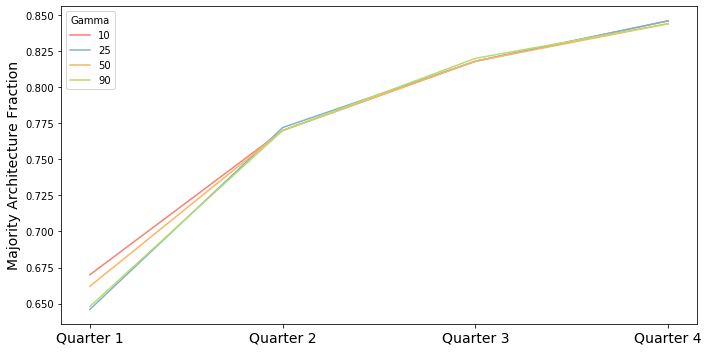

In [4]:
###FIGURE: Line plot of majority fraction over time
hyp_data = pd.read_csv('../data/supplementary_data/parsed_hyparparameter_results.csv')
pal = sns.color_palette("Set3")[3:7]
fig, axs = plt.subplots(1,1,figsize=(10, 5))
ax = axs
sns.lineplot(data=hyp_data, y='majority_fraction', x='quarter', hue='Gamma', palette=pal, ax=ax, legend=True)
ax.set_ylabel(r'Majority Architecture Fraction', fontsize=14)
ax.set_xlabel('')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'])
ax.tick_params(axis='x', labelsize=14)
fig.tight_layout()

if save_figs: fig.savefig('../figs/supp_hyperparameter.png', dpi=300)

In [20]:
###Fatty acid data processing
orders = ['Open Loop', 'Open Loop Intermediate', 'Negative Gene Loop', 'Negative Metabolic Loop', 'Layered Negative Metabolic Loop']
palette = {'Open Loop': sns.color_palette()[3], 'Open Loop Intermediate': 'tab:purple', 'Negative Metabolic Loop': 'tab:green', 'Negative Gene Loop': 'tab:orange', 'Layered Negative Metabolic Loop': 'tab:blue', 'Initial':'black'}

total_landscape = pd.read_csv('../data/fatty_acid_background_singlearch.csv')
plot_landscape = total_landscape.loc[total_landscape.iteration == 499]

ol_landscape = total_landscape.loc[total_landscape.circuit == 'Open Loop'].reset_index(drop=True)
oli_landscape = total_landscape.loc[total_landscape.circuit == 'Open Loop Intermediate'].reset_index(drop=True)
ngl_landscape = total_landscape.loc[total_landscape.circuit == 'Negative Gene Loop'].reset_index(drop=True)
nml_landscape = total_landscape.loc[total_landscape.circuit == 'Negative Metabolic Loop'].reset_index(drop=True)
lnml_landscape = total_landscape.loc[total_landscape.circuit == 'Layered Negative Metabolic Loop'].reset_index(drop=True)

start = 0
stop = 500
params = []
circuits = []
locs = []
locations = []
for i in range(100):
    params.append(ol_landscape.iloc[start:stop].loc[ol_landscape.loss == ol_landscape.iloc[start:stop].loss.min()].loss.to_list()[0])
    circuits.append('Open Loop')
    locs.append('$f(x)$')
    locations.append(1)
    
    params.append(ol_landscape.iloc[start:stop].loc[ol_landscape.loss == ol_landscape.iloc[start:stop].loss.min()].r_lac_ol.to_list()[0])
    circuits.append('Open Loop')
    locs.append('$R_{lac}$')
    locations.append(2)

    params.append(oli_landscape.iloc[start:stop].loc[oli_landscape.loss == oli_landscape.iloc[start:stop].loss.min()].loss.to_list()[0])
    circuits.append('Open Loop Intermediate')
    locs.append('$f(x)$')
    locations.append(1)

    params.append(oli_landscape.iloc[start:stop].loc[oli_landscape.loss == oli_landscape.iloc[start:stop].loss.min()].r_lac_oli.to_list()[0])
    circuits.append('Open Loop Intermediate')
    locs.append('$R_{lac}$')
    locations.append(2)

    params.append(oli_landscape.iloc[start:stop].loc[oli_landscape.loss == oli_landscape.iloc[start:stop].loss.min()].r_bad_oli.to_list()[0])
    circuits.append('Open Loop Intermediate')
    locs.append('$R_{bad}$')
    locations.append(3)

    params.append(ngl_landscape.iloc[start:stop].loc[ngl_landscape.loss == ngl_landscape.iloc[start:stop].loss.min()].loss.to_list()[0])
    circuits.append('Negative Gene Loop')
    locs.append('$f(x)$')
    locations.append(1)

    params.append(ngl_landscape.iloc[start:stop].loc[ngl_landscape.loss == ngl_landscape.iloc[start:stop].loss.min()].r_tl_ngl.to_list()[0])
    circuits.append('Negative Gene Loop')
    locs.append('$R_{tl}$')
    locations.append(2)

    params.append(ngl_landscape.iloc[start:stop].loc[ngl_landscape.loss == ngl_landscape.iloc[start:stop].loss.min()].r_tl_tetR_ngl.to_list()[0])
    circuits.append('Negative Gene Loop')
    locs.append('$R_{tl, tetR}}$')
    locations.append(3)

    params.append(nml_landscape.iloc[start:stop].loc[nml_landscape.loss == nml_landscape.iloc[start:stop].loss.min()].loss.to_list()[0])
    circuits.append('Negative Metabolic Loop')
    locs.append('$f(x)$')
    locations.append(1)

    params.append(nml_landscape.iloc[start:stop].loc[nml_landscape.loss == nml_landscape.iloc[start:stop].loss.min()].r_fl_prime_nml.to_list()[0])
    circuits.append('Negative Metabolic Loop')
    locs.append('$R_{FL^*}$')
    locations.append(2)

    params.append(nml_landscape.iloc[start:stop].loc[nml_landscape.loss == nml_landscape.iloc[start:stop].loss.min()].ki_nml.to_list()[0])
    circuits.append('Negative Metabolic Loop')
    locs.append('$k_{i}$')
    locations.append(3)

    params.append(lnml_landscape.iloc[start:stop].loc[lnml_landscape.loss == lnml_landscape.iloc[start:stop].loss.min()].loss.to_list()[0])
    circuits.append('Layered Negative Metabolic Loop')
    locs.append('$f(x)$')
    locations.append(1)

    params.append(lnml_landscape.iloc[start:stop].loc[lnml_landscape.loss == lnml_landscape.iloc[start:stop].loss.min()].r_tl_lnml.to_list()[0])
    circuits.append('Layered Negative Metabolic Loop')
    locs.append('$R_{tl}$')
    locations.append(2)

    params.append(lnml_landscape.iloc[start:stop].loc[lnml_landscape.loss == lnml_landscape.iloc[start:stop].loss.min()].r_ar2_lnml.to_list()[0])
    circuits.append('Layered Negative Metabolic Loop')
    locs.append('$R_{AR2}$')
    locations.append(3)

    start=stop
    stop+= 100

plot_data = pd.DataFrame({'param':params, 'circuit':circuits, 'name':locs, 'locations':locations})

sloppydata = pd.DataFrame({'circuit':[], 'name':[], 'sloppiness':[]})
for c in orders:
    circuit_data = plot_data.loc[plot_data.circuit == c]
    for p in circuit_data.name.unique():
        param_data = circuit_data.loc[circuit_data.name == p]
        sloppiness = param_data.param.std()/param_data.param.mean()
        row = [c, p, sloppiness]
        sloppydata.loc[len(sloppydata)] = row

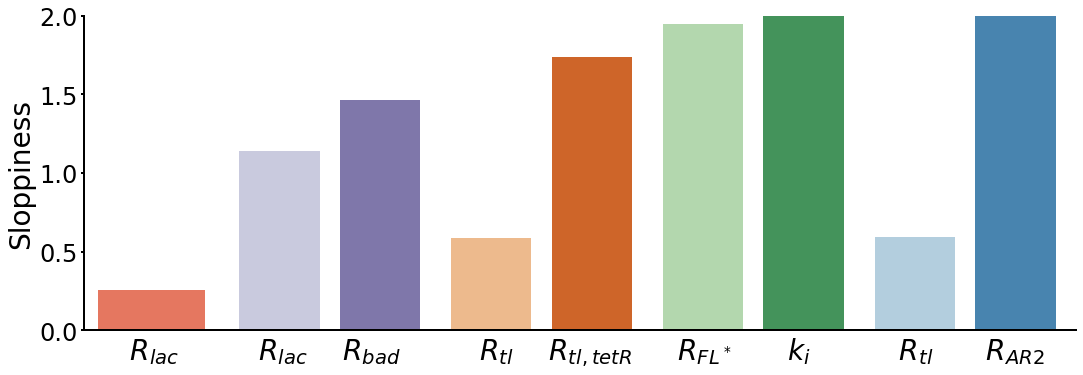

In [26]:
### Figure: Mean loss by architecture
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(nrows=1, ncols=5, width_ratios=[2, 3, 3, 3, 3])

palettes = ['Reds', 'Purples', 'Oranges', 'Greens', 'Blues']

for i in range(5):
    ax = fig.add_subplot(gs[i])
    c = orders[i]
    circuit_data = sloppydata.loc[sloppydata.circuit == c].loc[sloppydata.name != '$f(x)$']

    sns.barplot(data=circuit_data, y='sloppiness', x='name', hue='name', palette=palettes[i], ax=ax, dodge=False)
    ax.set_ylabel('Sloppiness', fontsize=28)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelsize=28)

    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_ylim([0, 2.0])
    ax.legend_.remove()

    ax.tick_params(axis='y', labelsize=24)
    ax.tick_params(axis='x', labelsize=24)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(width=2)

    if i != 0:  
        ax.set_ylabel('')
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
    

# fig.text(0.07, -0.09, 'Open Loop    Open Loop         Negative          Negative     Layered Negative ', ha='left', fontsize=28)
# fig.text(0.15, -0.16, '          Intermediate     Gene Loop    Metabolic Loop  Metabolic Loop', ha='left', fontsize=28)
fig.text(0.09, -0.01, '    $R_{lac}$         $R_{lac}$    $R_{bad}$         $R_{tl}$    $R_{tl, tetR}}$     $R_{FL^*}$      $k_{i}$          $R_{tl}$      $R_{AR2}$', ha='left', fontsize=28)
fig.add_artist(Line2D([0.08, 1], [0.07, 0.07], color='k', linewidth=2))

fig.tight_layout()
fig.savefig('../figs/supp_fatty_acid_coeff_var_barplot.png', dpi=500,  bbox_inches='tight', pad_inches=0.5)



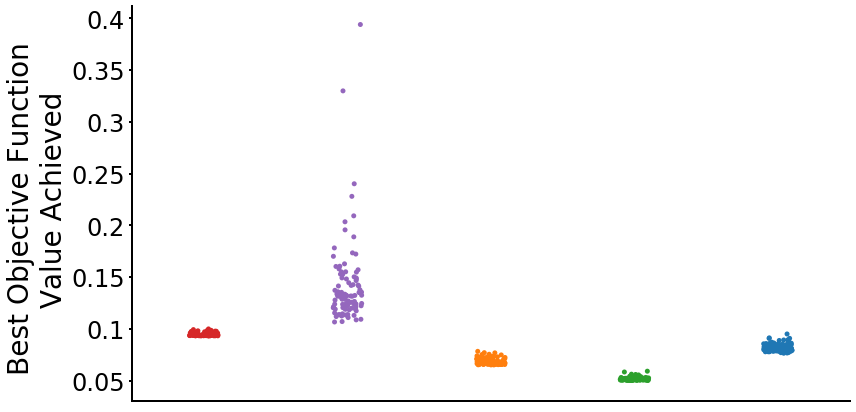

In [27]:
#FIGURE Objective function value strip plot
fig, ax = plt.subplots(1, 1,figsize=(4*3, 2*3))
sns.stripplot(data=plot_landscape, x="circuit", y="best_losses" , palette=palette, ax=ax, jitter=True)

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40], fontsize=24)
ax.set_ylabel('Best Objective Function \n Value Achieved', fontsize=28)
ax.set_xlabel('')

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)

fig.tight_layout()
fig.savefig('../figs/supp_fatty_acid_objective_fn_strip.png', dpi=300)

